In [76]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [72]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [75]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [77]:
import numpy as np
np.unique(x_train[0], return_counts=True)

(array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
         27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
         70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
        127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
        170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
        207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
        247, 249, 250, 251, 252, 253, 255], dtype=uint8),
 array([618,   2,   3,   1,   1,   3,   1,   2,   5,   1,   1,   1,   1,
          1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   2,   1,
          1,   1,   2,   2,   2,   1,   2,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   2,   1,   1,   1,   3,   1,   1,   1,
          1,   1,   2,   1,   2,   1,   1,   1,   2,   2,   2,   1,   1,
          1,   1,   1,   2,   1,   2,   1,   1,   1,   1,   2,   1,   1,
          2,   2,   1,   1,   1,  54,   1]))

In [78]:
xtrain = x_train.reshape((-1, 28,28, 1)) / 255.0
ytrain = to_categorical(y_train)
xtrain.shape, ytrain.shape

((60000, 28, 28, 1), (60000, 10))

In [79]:
xtest = x_test.reshape((-1, 28,28, 1)) / 255.0
ytest = to_categorical(y_test)
xtest.shape, ytest.shape

((10000, 28, 28, 1), (10000, 10))

In [80]:
import matplotlib.pyplot as plt
def drawImg(x):
  img = x.reshape((28, 28))
  plt.imshow(img, cmap='gray')
  plt.show()

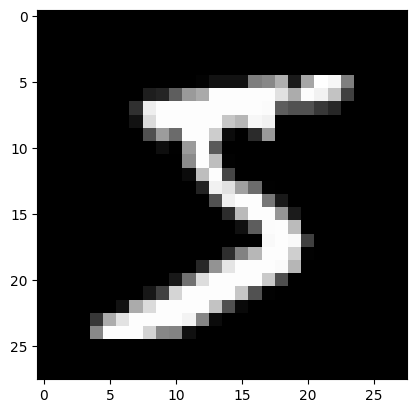

In [81]:
drawImg(xtrain[0])

In [82]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [83]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 3136)            

In [84]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [86]:
hist = model.fit(xtrain, ytrain, epochs=30, validation_split=0.1, batch_size=128)

Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0376 - val_accuracy: 0.9922
Epoch 2/30
422/422 [==============================] - 2s 6ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0524 - val_accuracy: 0.9883
Epoch 3/30
422/422 [==============================] - 3s 7ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0372 - val_accuracy: 0.9917
Epoch 4/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0390 - val_accuracy: 0.9927
Epoch 5/30
422/422 [==============================] - 2s 6ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0396 - val_accuracy: 0.9915
Epoch 6/30
422/422 [==============================] - 2s 6ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0366 - val_accuracy: 0.9927
Epoch 7/30
422/422 [==============================] - 2s 6ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0420 - val_accuracy: 0.9912
Epoch 

In [87]:
h = hist.history
accuracy = h['accuracy']
val_accuracy = h['val_accuracy']
val_loss = h['val_loss']
loss = h['loss']

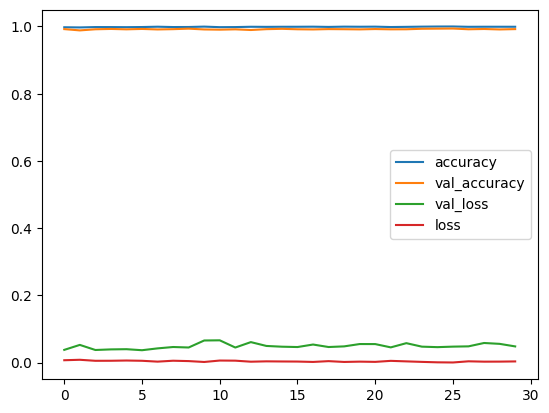

In [88]:
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.plot(val_loss, label='val_loss')
plt.plot(loss, label='loss')
plt.legend()
plt.show()

In [89]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.0394 - accuracy: 0.9932


[0.03939594700932503, 0.9932000041007996]